# Let's make some movies (in `python`)!

To follow along, please download [github.com/zkbt/how-to-make-movies](https://github.com/zkbt/how-to-make-movies)

# Why make movies?

A movie can show how a system changes with time.
<video src='Pythagorean345_movie.mp4' width=100% controls loop></video>

A movie can help express data or calculations with more than two dimensions.
<video src='planetcontrast.mp4' width=100% controls loop></video>

A movie can help express complicated linked ideas or phenomena.
<video src='earth-sunset.mp4' width=100% controls loop></video>

# How do we make movies?

You probably already have all the tools you need to make movies = `matplotlib`. 

In [1]:
# some basic imports
import matplotlib.pyplot as plt, numpy as np
import matplotlib.animation as ani

However, you might need to `conda install ffmpeg` to get access to the nicest encoder for making movies as `.mp4` files.

It can also be helpful to have a progress bar for big loops:

In [2]:
from tqdm import tqdm

## The Individual Image Flipbook Method:
Conceptually, a movie is a flipbook: (slightly) different plots viewed one after another.

In [3]:
!mkdir flipbook

mkdir: flipbook: File exists


100%|██████████| 30/30 [00:04<00:00,  7.16it/s]


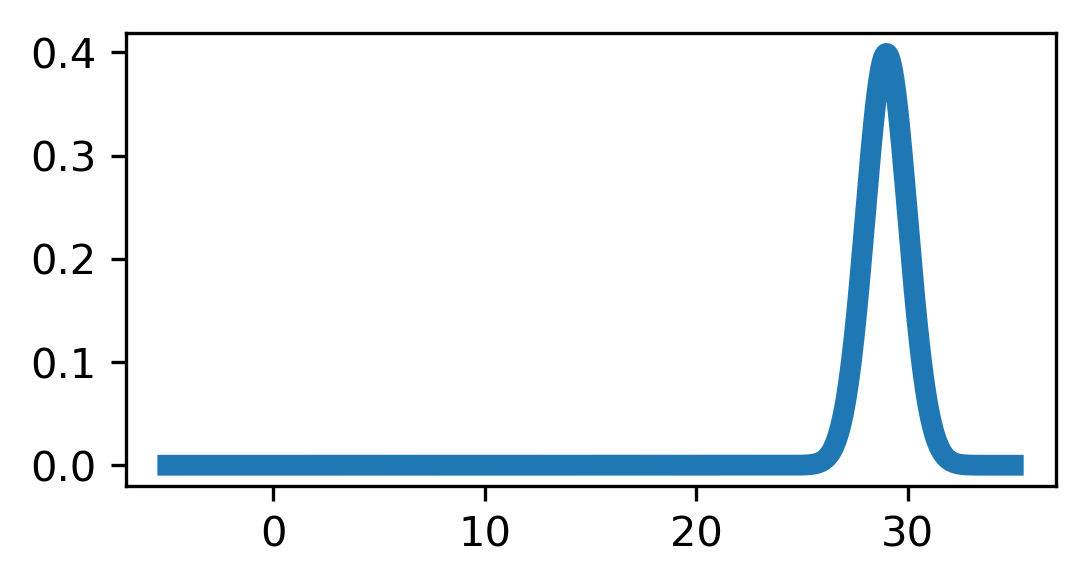

In [4]:
# create a matplotlib figure
figure = plt.figure(figsize=(4, 2), dpi=300)

# create an x-axis
x = np.linspace(-5, 35, 1000)

# loop over exposures
for center in tqdm(range(30)):

    # redefine the array of y values
    y = 1/np.sqrt(2*np.pi)*np.exp(-0.5*(x - center)**2)

    # clear any data that's on the axes
    plt.cla()

    # plot the new data
    plt.plot(x, y, linewidth=5)

    # save this snapshot to a movie frame
    plt.savefig(f'flipbook/page-{center:02.0f}.png')

If we look at all those 30 images in order, it looks like a movie.

In [5]:
!open flipbook/

Command-line tools like `ffmpeg` or `convert` (= ImageMagick) could be used to stitch individual frames together into a movie file. But, I find it easier to do this directly in Python.

## The *Creating* Movie Frames Flipbook Method:
Instead of saving frames as their own individual image files, we can save them directly to the frames of a movie file.

100%|██████████| 30/30 [00:02<00:00, 11.79it/s]


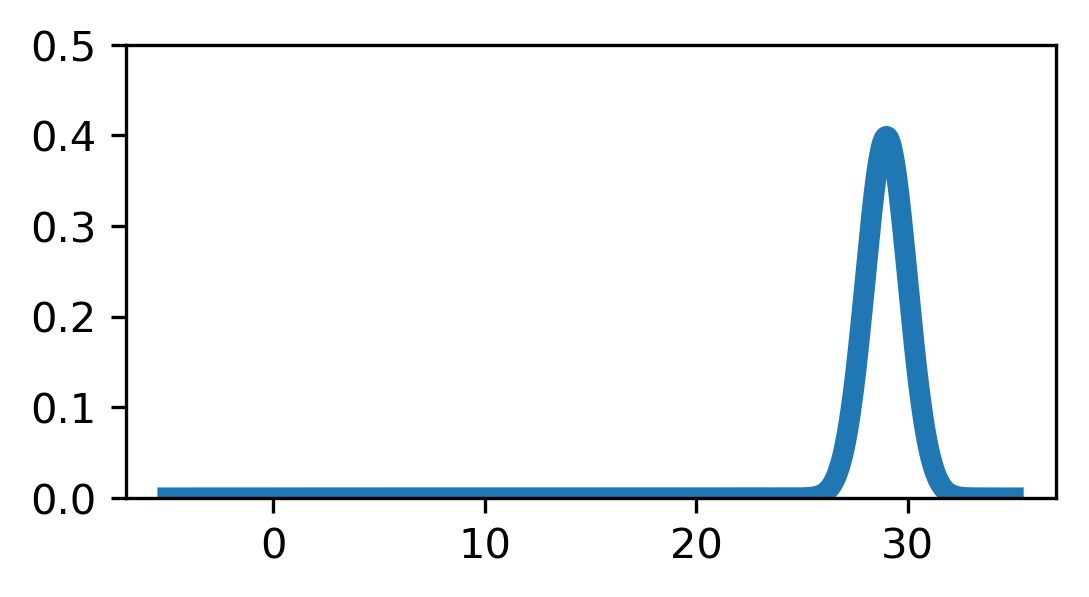

In [6]:
# create a matplotlib figure
figure = plt.figure(figsize=(4, 2), dpi=300)

# initialize the animator
writer = ani.FFMpegWriter(fps=15, bitrate=1000)

# create an x-axis
x = np.linspace(-5, 35, 1000)

# the "with" construction is a little confusing (= copy and paste it?)
with writer.saving(figure, 'flipbook/cruising-gaussian.mp4', figure.get_dpi()):

    # loop over exposures
    for center in tqdm(range(30)):

        # redefine the array of y values
        y = 1/np.sqrt(2*np.pi)*np.exp(-0.5*(x - center)**2)

        # clear any data that's on the axes
        plt.cla()

        # plot the new data
        plt.plot(x, y, linewidth=5)
        plt.ylim(0, 0.5)
        
        # save this snapshot to a movie frame
        writer.grab_frame()

This loop made a bunch different plots and wrote each as a subsequent frame of a movie:

In [7]:
!open flipbook/cruising-gaussian.mp4

The core ingredients:
+ define a `writer`, which allows us to connect to a movie file
+ connect that `writer` to a `figure`, saying what you want to write
+ write frames to the movie with `writer.grab_frame()`

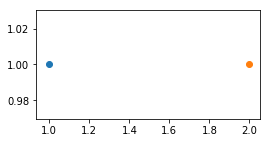

In [8]:
# this "writer" object will us connected to the file we're writing into
writer = ani.FFMpegWriter(fps=1, bitrate=1000)
# fps = frames/second, bitrate = bits/second (= higher for better quality)

figure = plt.figure(figsize=(4,2)) # where are we plotting?
filename = 'boring-movie.mp4' # the filename of the movie
dpi = 300 # this is the dots-per-inch of the movie

# inside this `with` block, we can (if we want to) save a frame to the file
with writer.saving(figure, filename, dpi):

    # save a snapshot of the current figure to a movie frame
    writer.grab_frame()
    
    # add a point
    plt.scatter([1], [1])

    # save a snapshot of the current figure to a movie frame
    writer.grab_frame()
    
    # add a point
    plt.scatter([2], [1])

    # save a snapshot of the current figure to a movie frame
    writer.grab_frame()

We called `writer.grab_frame()` three times, so our movie has three frames:

In [9]:
!open boring-movie.mp4

## The *Updating* Movie Frames Flipbook Method:
Before, we were recreating the *entire* figure at each step. This is hard because
+ some things might change that you want to remain constant (e.g. `xlim`, `xlim`)
+ it takes more time for Python

It'd be nice if we could just update the parts of the plot that we actually want to change. Getting efficient at this might will some practice and lots of googling `matplotlib` plotting objects.

100%|██████████| 30/30 [00:00<00:00, 31.65it/s]


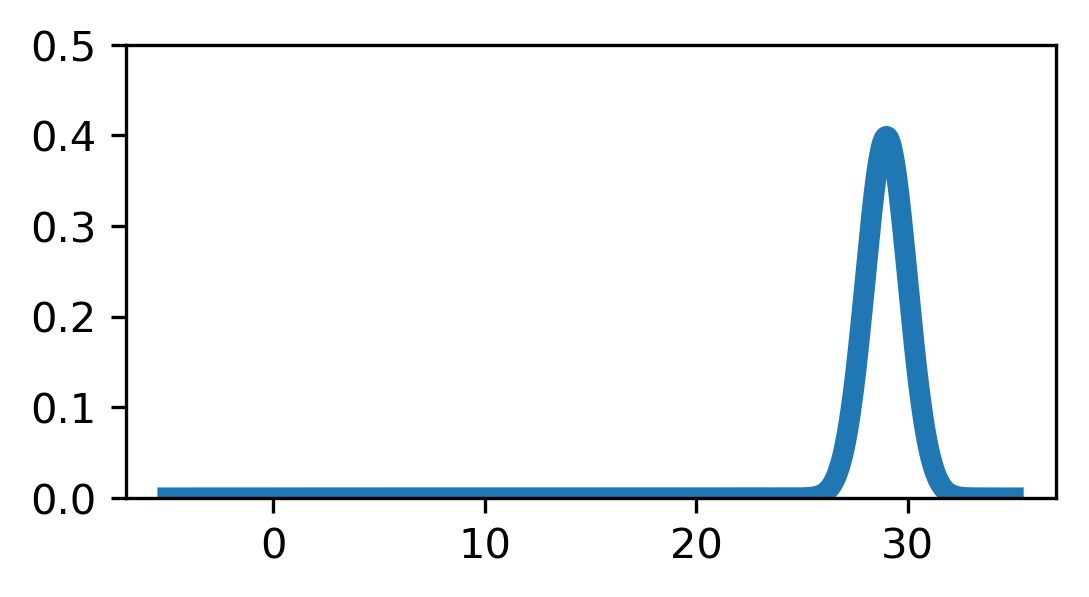

In [10]:
# create a matplotlib figure
figure = plt.figure(figsize=(4, 2), dpi=300)

# initialize the animator
writer = ani.FFMpegWriter(fps=15, bitrate=1000)

# create an x-axis and an empty y-axis
x = np.linspace(-5, 35, 1000)
y = np.zeros_like(x)
plt.ylim(0, 0.5)

# create a placeholder curve, and save its variable so we can change it later
lines = plt.plot(x, y, linewidth=5)

# the "with" construction is a little confusing, but feel free to copy and paste this
with writer.saving(figure, 'flipbook/another-cruising-gaussian.mp4', figure.get_dpi()):

    # loop over exposures
    for center in tqdm(range(30)):

        # update the array of y values
        y = 1/np.sqrt(2*np.pi)*np.exp(-0.5*(x - center)**2)
        
        # update the positions of the plotted line
        lines[0].set_data(x, y)
        
        # save this snapshot to a movie frame
        writer.grab_frame()

Neat, it makes that same old movie.

In [11]:
!open flipbook/another-cruising-gaussian.mp4

# What if we want to make an animated `.gif`?

All we need to do is change the file extension of the movie from `.mp4` to `.gif`, and change the animation writer object from `FFMpegWriter` to `PillowWriter`.

In [ ]:
# create a matplotlib figure
figure = plt.figure(figsize=(4, 2), dpi=300)

# initialize the animator
writer = ani.PillowWriter(fps=15, bitrate=1000)

# create an x-axis
x = np.linspace(-5, 35, 1000)

# the "with" construction is a little confusing (= copy and paste it?)
with writer.saving(figure, 'flipbook/cruising-gaussian.gif', figure.get_dpi()):

    # loop over exposures
    for center in tqdm(range(30)):

        # redefine the array of y values
        y = 1/np.sqrt(2*np.pi)*np.exp(-0.5*(x - center)**2)

        # clear any data that's on the axes
        plt.cla()

        # plot the new data
        plt.plot(x, y, linewidth=5)
        plt.ylim(0, 0.5)
        
        # save this snapshot to a movie frame
        writer.grab_frame()

100%|██████████| 30/30 [00:02<00:00, 12.77it/s]


<img src='flipbook/cruising-gaussian.gif'>

### All of these methods work. You do you!

1. The Individual Image Flipbook Method writes 6.5 frames in 1 second.
2. The *Creating* Movie Frames Flipbook Method writes 21 frames in 1 second.
3. The *Updating* Movie Frames Flipbook Method writes 45 frames in 1 second.

Option (2) ("*Creating*") is often a good compromise (if you haven't weirdly memorized how the objects returned by `plot`, `scatter`, `imshow`, ... work), but in some cases you might find it worth investing in (3).

# Make your own movie: 
+ Clone/download [github.com/zkbt/how-to-make-movies](https://github.com/zkbt/how-to-make-movies)
+ Use `jupyter` to load the starter notebook `fitting-leavitt-law-demo.ipynb`.
+ Run the starter cells, and make you own movie with the 25 periods and magnitudes that went into the first "Leavitt Law" period-luminosity relationship for Cepheid variables.